# Non-negative matrix factorization (NMF)
NMF stands for "non-negative matrix factorization". NMF, like PCA, is a dimension reduction technique. In constract to PCA, however, NMF models are interpretable. This means an NMF models are easier to understand yourself, and much easier for you to explain to others. NMF can not be applied to every dataset, however. It is required that the sample features be "non-negative", so greater than or equal to 0.

## Import depenencies

In [ ]:
'''Main'''
import pandas as pd
import numpy as np
import scipy

'''Data viz'''
from matplotlib import pyplot as plt

%matplotlib inline

'''Algorithms'''
from sklearn.decomposition import NMF, PCA
from sklearn.preprocessing import normalize, Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

## Load the Data

In [ ]:
!wget 'https://assets.datacamp.com/production/repositories/655/datasets/8e2fbb5b8240c06602336f2148f3c42e317d1fdb/Wikipedia%20articles.zip'
!unzip '/content/Wikipedia articles.zip'


--2021-10-04 14:53:11--  https://assets.datacamp.com/production/repositories/655/datasets/8e2fbb5b8240c06602336f2148f3c42e317d1fdb/Wikipedia%20articles.zip
Resolving assets.datacamp.com (assets.datacamp.com)... 104.18.16.147, 104.18.17.147
Connecting to assets.datacamp.com (assets.datacamp.com)|104.18.16.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K)
Saving to: ‘Wikipedia articles.zip.1’

Wikipedia articles. 100%[===================>] 462.73K  --.-KB/s    in 0.1s    

2021-10-04 14:53:12 (3.26 MB/s) - ‘Wikipedia articles.zip.1’ saved [473831/473831]

Archive:  /content/Wikipedia articles.zip
replace Wikipedia articles/preprocessing.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
articles = pd.read_csv('/content/Wikipedia articles/wikipedia-vectors.csv', index_col=0)
titles = list(articles.columns)

articles = scipy.sparse.csr_matrix(articles.values) # To crs_matrix form
articles = articles.reshape((60, -1))

# NMF applied to Wikipedia articles

In the video, you saw NMF applied to transform a toy word-frequency array. Now it's your turn to apply NMF, this time using the tf-idf word-frequency array of Wikipedia articles, given as a csr matrix **`articles`**. Here, fit the model and transform the articles.

In [ ]:
# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))

[[0.01 0.02 0.03 0.04 0.02 0.05]
 [0.01 0.01 0.05 0.04 0.03 0.07]
 [0.01 0.02 0.01 0.01 0.03 0.03]
 [0.02 0.02 0.   0.01 0.02 0.03]
 [1.09 0.   0.   0.   0.   0.  ]
 [0.   0.01 0.02 0.01 0.01 0.02]
 [0.04 0.01 0.03 0.02 0.03 0.06]
 [0.01 0.02 0.02 0.04 0.01 0.03]
 [0.01 0.02 0.02 0.01 0.03 0.06]
 [0.   0.   0.   0.   0.   1.31]
 [0.01 0.01 0.07 0.02 0.03 0.02]
 [0.   0.01 0.01 0.01 0.01 0.02]
 [0.   0.03 0.02 0.02 0.01 0.02]
 [0.01 0.02 0.04 0.03 0.03 0.03]
 [0.   0.01 0.01 0.01 0.01 0.01]
 [0.02 0.01 0.01 0.01 0.01 0.02]
 [0.01 0.03 0.02 0.01 0.01 0.01]
 [0.01 0.02 0.01 0.01 0.01 0.02]
 [0.01 0.03 0.01 0.02 0.03 0.04]
 [0.02 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.02 0.01 0.02 0.02 0.02]
 [0.   0.   1.39 0.   0.   0.  ]
 [0.01 0.09 0.02 0.03 0.02 0.11]
 [0.   0.   0.   1.17 0.   0.  ]
 [0.01 0.01 0.03 0.02 0.02 0.02]
 [0.   0.01 0.1  0.03 0.02 0.02]
 [0.   0.01 0.01 0.01 0.02 0.06]
 [0.02 0.02 0.02 0.02 0.04 0.05]
 [0.   0.01 0.02 0.01 0.01 0.01]
 [0.01 0.04 0.04 0.03 0.03 0.03]
 [0.01 0.0

# NMF features of the Wikipedia articles

Now you will explore the NMF features you created in the previous exercise. A solution to the previous exercise has been pre-loaded, so the array **`nmf_features`** is available. Also available is a list **`titles`** giving the title of each Wikipedia article.

When investigating the features, notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component.

In [ ]:
# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.002808
1    0.012405
2    0.024693
3    0.005870
4    0.011288
5    0.012912
Name: Anne Hathaway, dtype: float64
0    0.006303
1    0.086914
2    0.016514
3    0.031280
4    0.015470
5    0.114810
Name: Denzel Washington, dtype: float64


# NMF learns interpretable parts

## NMF learns topics of documents

In [ ]:
words = pd.read_csv('/content/Wikipedia articles/wikipedia-vocabulary-utf8.txt', header=None)
words = words[0].to_list()

In [ ]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())


(6, 13125)
write        0.642358
symptoms     0.319587
synonym      0.275269
writes       0.264831
southward    0.233779
Name: 3, dtype: float64


## Explore the LED digits dataset

In the following exercises, you'll use NMF to decompose grayscale images into their commonly occurring patterns. Firstly, explore the image dataset and see how it is encoded as an array. You are given 100 images as a 2D array **`samples`**, where each row represents a single 13x8 image. The images in your dataset are pictures of a LED digital display.

In [ ]:
!wget 'https://assets.datacamp.com/production/repositories/655/datasets/effd1557b8146ab6e620a18d50c9ed82df990dce/lcd-digits.csv'

--2021-10-04 14:55:15--  https://assets.datacamp.com/production/repositories/655/datasets/effd1557b8146ab6e620a18d50c9ed82df990dce/lcd-digits.csv
Resolving assets.datacamp.com (assets.datacamp.com)... 104.18.17.147, 104.18.16.147
Connecting to assets.datacamp.com (assets.datacamp.com)|104.18.17.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41600 (41K)
Saving to: ‘lcd-digits.csv.1’

lcd-digits.csv.1    100%[===================>]  40.62K  --.-KB/s    in 0s      

2021-10-04 14:55:15 (113 MB/s) - ‘lcd-digits.csv.1’ saved [41600/41600]



In [ ]:
samples = pd.read_csv('/content/lcd-digits.csv', header=None).to_numpy()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


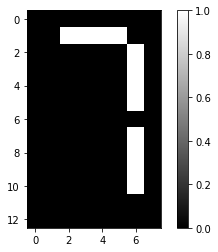

In [ ]:
# Select the 0th row: digit
digit = samples[0, :]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape((13, 8))

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

NMF learns the parts of images

Now use what you've learned about NMF to decompose the digits dataset. You are again given the digit images as a 2D array **`samples`**. This time, you are also provided with a function **`show_as_image(`**) that displays the image encoded by any 1D array:

In [ ]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

After you are done, take a moment to look through the plots and notice how NMF has expressed the digit as a sum of the components!

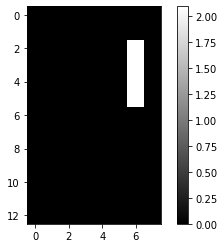

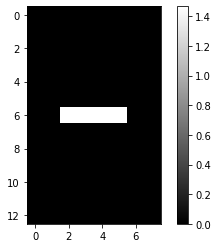

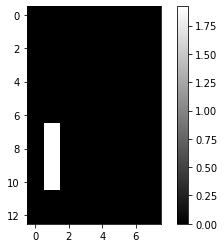

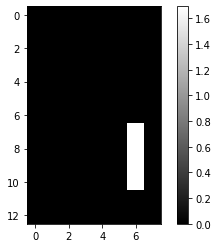

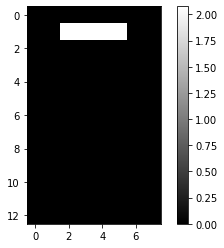

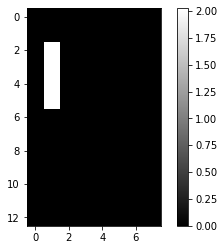

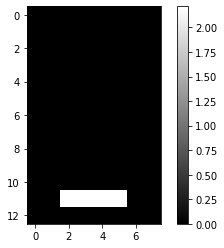

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37557191e-16]


In [ ]:
# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0, :]

# Print digit_features
print(digit_features)

## PCA doesn't learn parts

Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. Verify this for yourself by inspecting the components of a PCA model fit to the dataset of LED digit images from the previous exercise. The images are available as a 2D array **`samples`**. Also available is a modified version of the **`show_as_image()`** function which colors a pixel red if the value is negative.

Notice that the components of PCA do not represent meaningful parts of images of LED digits!

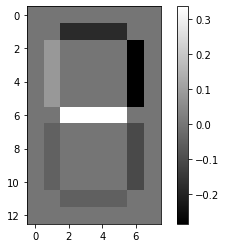

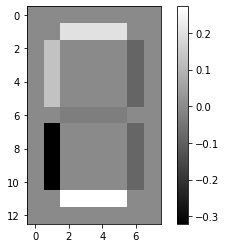

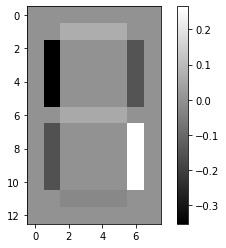

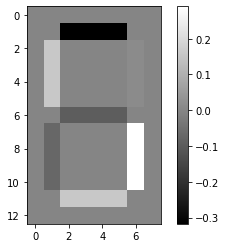

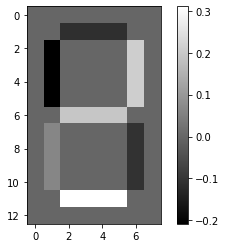

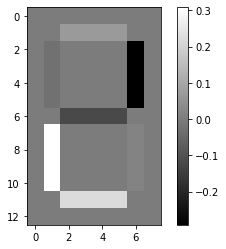

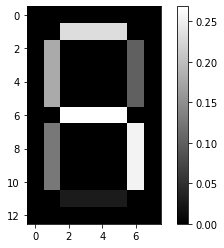

In [ ]:
# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Building recommender systems using NMF
Suppose that you are an engineer at a large online newspaper. You've been given the task of recommending articles that are similar to the article currently being read by a customer. Given an article, how can you find articles that have similar topics?

## Strategy
Our strategy for solving this problem is to apply NMF to the word-frequency array of the articles, and to use the resulting NMF features.

## Which articles are similar to 'Cristiano Ronaldo'?

In the video, you learned how to use NMF features and the cosine similarity to find similar articles. Apply this to your NMF model for popular Wikipedia articles, by finding the articles most similar to the article about the footballer Cristiano Ronaldo. The NMF features you obtained earlier are available as **`nmf_features`**, while **`titles`** is a list of the article titles.

In [ ]:
# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo    1.000000
Angelina Jolie       0.949824
Adam Levine          0.941409
Social search        0.937445
The Wanted           0.937337
dtype: float64


##Recommend musical artists part I


### Load the Data

In [ ]:
!wget 'https://raw.githubusercontent.com/thaile-isme/datasets-for-datacamp/main/artists.csv'

artists = pd.read_csv('/content/artists.csv')
artists = scipy.sparse.csr_matrix(artists)

--2021-10-04 14:56:42--  https://raw.githubusercontent.com/thaile-isme/datasets-for-datacamp/main/artists.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228356 (223K) [text/plain]
Saving to: ‘artists.csv.4’

artists.csv.4       100%[===================>] 223.00K  --.-KB/s    in 0.05s   

2021-10-04 14:56:42 (4.14 MB/s) - ‘artists.csv.4’ saved [228356/228356]



In [ ]:
!wget 'https://assets.datacamp.com/production/repositories/655/datasets/c974f2f2c4834958cbe5d239557fbaf4547dc8a3/Musical%20artists.zip'
!unzip '/content/Musical artists.zip'

artist_names = pd.read_csv("/content/Musical artists/artists.csv", header=None)
artist_names = artist_names[0].to_list()

--2021-10-04 14:55:37--  https://assets.datacamp.com/production/repositories/655/datasets/c974f2f2c4834958cbe5d239557fbaf4547dc8a3/Musical%20artists.zip
Resolving assets.datacamp.com (assets.datacamp.com)... 104.18.17.147, 104.18.16.147
Connecting to assets.datacamp.com (assets.datacamp.com)|104.18.17.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13332 (13K)
Saving to: ‘Musical artists.zip.1’

Musical artists.zip 100%[===================>]  13.02K  --.-KB/s    in 0.01s   

2021-10-04 14:55:37 (1.16 MB/s) - ‘Musical artists.zip.1’ saved [13332/13332]

Archive:  /content/Musical artists.zip
replace Musical artists/artists.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

You are given a sparse array artists whose rows correspond to **`artists`** and whose columns correspond to users. The entries give the number of times each artist was listened to by each user.

In [ ]:
# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

## Recommend musical artists part II

Suppose you were a big fan of Bruce Springsteen - which other musicial artists might you like? Use your NMF features from the previous exercise and the cosine similarity to find similar musical artists. A solution to the previous exercise has been run, so **`norm_features`** is an array containing the normalized NMF features as rows. The names of the musical artists are available as the list **`artist_names`**.

In [ ]:
# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())

Bruce Springsteen    1.000000
Neil Young           0.955419
Van Morrison         0.871051
Leonard Cohen        0.863462
Bob Dylan            0.857675
dtype: float64
